In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

plt.rcParams.update({
    "text.usetex": True,              # If you want to use LaTeX fonts in text
    "font.family": "serif",           # IEEE uses Times New Roman-like fonts
    "font.size": 12,                   # General font size for IEEE format
    "axes.labelsize": 12,              # Axis labels font size
    "legend.fontsize": 11,             # Legend font size
    "xtick.labelsize": 11,             # X-axis tick labels font size
    "ytick.labelsize": 11,             # Y-axis tick labels font size
    "figure.figsize": (5, 5*0.8),
    "savefig.dpi": 300,               # DPI for high-quality PNG/JPEG
})

prime_video_color = "#1399FF"

## distribuicao de generos de filmes

In [2]:
genres = pd.read_csv("data/movies.csv")["genres"].str.split("|").tolist()
genres_dict = {}
for sublist in genres:
    for genre in sublist:
        if genre not in genres_dict:
            genres_dict[genre] = 1
        else:
            genres_dict[genre] += 1
#genres_dict

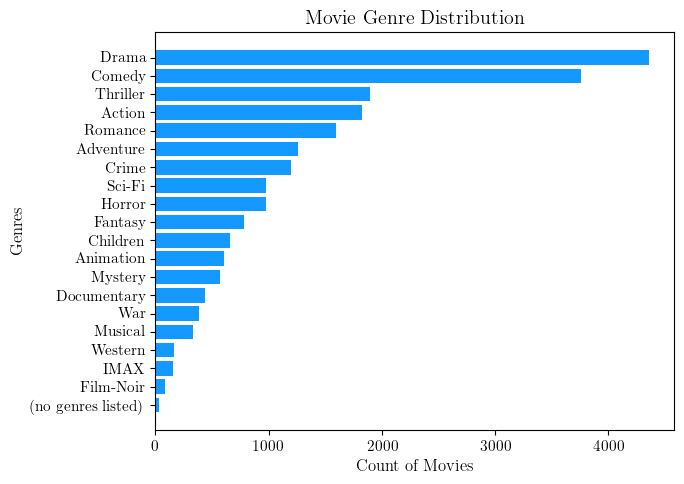

In [17]:
sorted_dict = dict(sorted(genres_dict.items(), key=lambda item: item[1]))

genres = list(sorted_dict.keys())
counts = list(sorted_dict.values())

plt.figure(figsize=(7, 5))
plt.barh(genres, counts, color=prime_video_color)
plt.xlabel('Count of Movies')
plt.ylabel('Genres')
plt.title('Movie Genre Distribution')
plt.tight_layout()
#plt.savefig("assets/genre_distribution.png")
plt.show()

## generos mais relacionados (cosine_similarity)

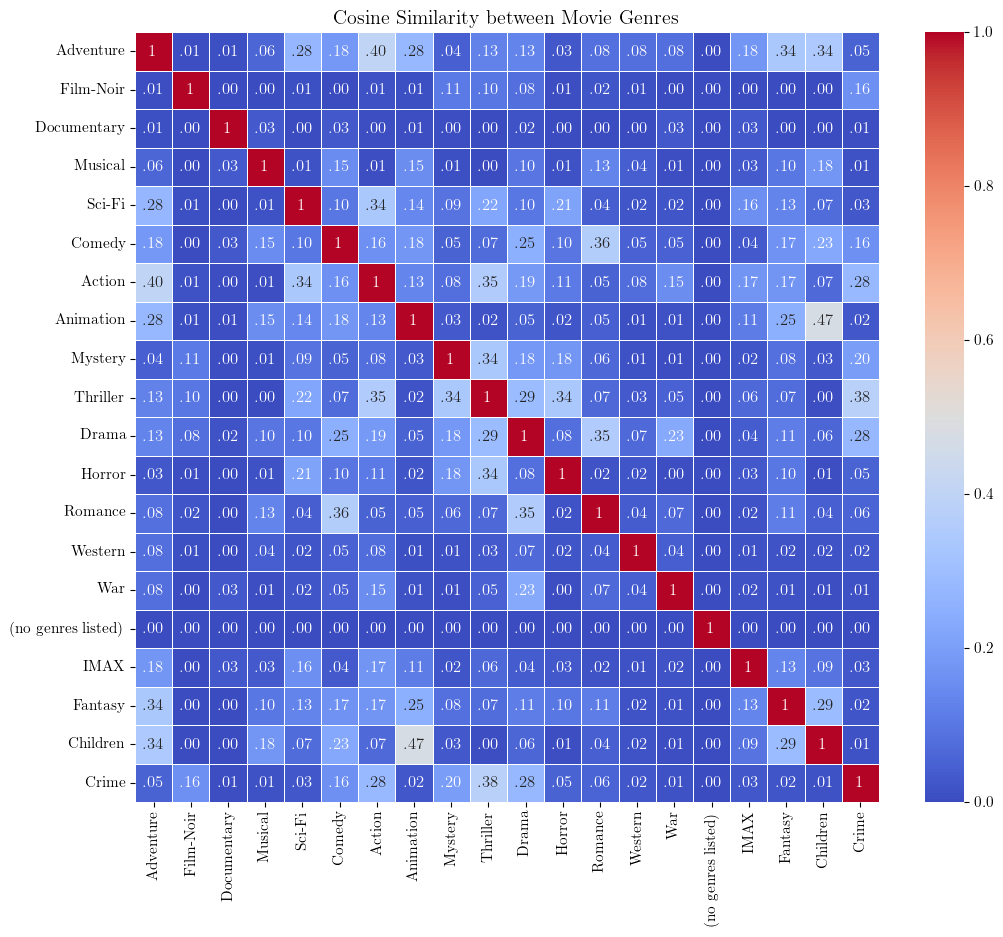

In [4]:
genres = pd.read_csv("data/movies.csv")["genres"].str.split("|").tolist()

all_genres = list(set([genre for sublist in genres for genre in sublist]))
data = []
for sublist in genres:
    row = [1 if genre in sublist else 0 for genre in all_genres]
    data.append(row)
df = pd.DataFrame(data, columns=all_genres)

corr_matrix = cosine_similarity(df.T)
corr_df = pd.DataFrame(corr_matrix, index=all_genres, columns=all_genres)

def format_value(val):
    if val > .99:  # Handle perfect correlation as an integer
        return '1'
    elif val == -1:  # Handle perfect negative correlation
        return '-1'
    formatted = f"{val:.2f}"  # Format to two decimal places
    if formatted.startswith('-0'):  # Handle negative values
        return '-' + formatted[2:]  # Remove the '0' after the '-'
    return formatted.lstrip('0')

annot_matrix = corr_df.map(format_value)

plt.figure(figsize=(12, 10))
plt.title('Cosine Similarity between Movie Genres')
sns.heatmap(corr_df, cmap='coolwarm', fmt='', annot=annot_matrix, linewidths=0.5)
#plt.savefig("assets/genre_similarity.png")
plt.show()

## anos que sairam os filmes

In [5]:
years = pd.read_csv("data/movies.csv")["title"].str.split(" ").tolist()
years_dict = {}
for sublist in years:
    year = sublist[-1]
    if len(year) == 6 and year[0] == "(" and year[-1] == ")":
        year = year[1:-1]
        try:
            year = int(year)
            year = year - year % 10
            
        except:
            continue
    else:
        continue
    #if year < 1910:
    #    print(sublist)
    if year not in years_dict:
        years_dict[year] = 1
    else:
        years_dict[year] += 1
#years_dict

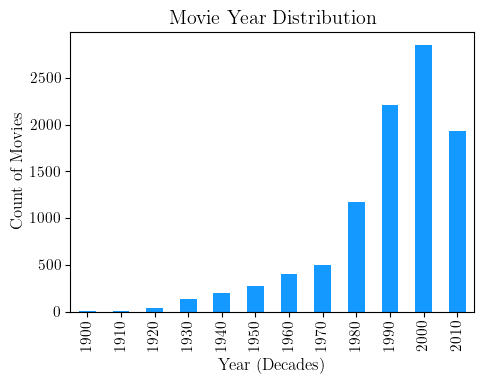

In [ ]:
years_dist = pd.Series(years_dict)
years_dist = years_dist.sort_index()

plt.figure(figsize=(5, 4))
years_dist.plot(kind='bar', color=prime_video_color)
plt.xlabel('Year (Decades)')
plt.ylabel('Count of Movies')
plt.title('Movie Year Distribution')
plt.tight_layout()
#plt.savefig("assets/year_distribution.png")
plt.show()

## dist de numero de avaliacoes de ratings

In [28]:
ratings = pd.read_csv("data/ratings.csv")
users = ratings["userId"].value_counts()
movies = ratings["movieId"].value_counts()

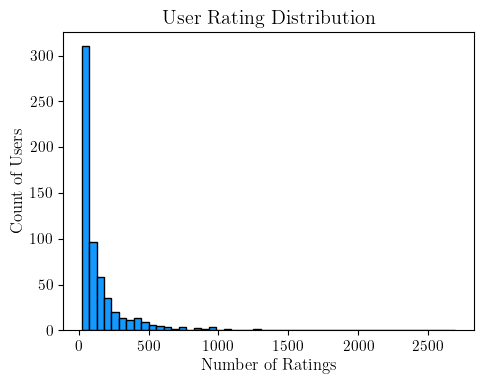

In [67]:
plt.figure(figsize=(5, 4))
plt.hist(users, bins=int(len(users)/12), edgecolor='black', color=prime_video_color)
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.title('User Rating Distribution')
plt.tight_layout()
#plt.savefig("assets/distribution_userratings.png")
plt.show()

In [71]:
print(min(users), max(users))

20 2698


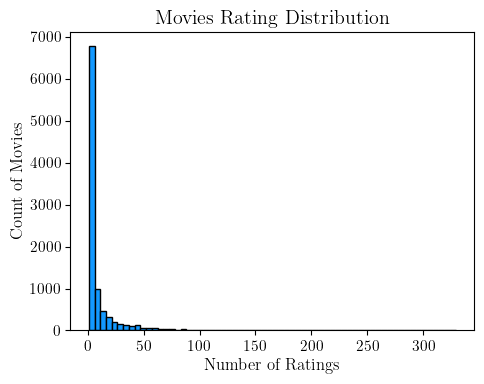

In [ ]:
plt.figure(figsize=(5, 4))
plt.hist(movies, bins=int(len(movies)/150), edgecolor='black', color=prime_video_color)
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Movies')
plt.title('Movies Rating Distribution')
plt.tight_layout()
#plt.savefig("assets/distribution_moviesratings.png")
plt.show()

In [72]:
print(min(movies), max(movies))

1 329


In [75]:
movies = ratings["movieId"].value_counts()
movies = movies[movies > 300]
movies 

movieId
356    329
318    317
296    307
Name: count, dtype: int64

## top 10 filmes com melhor ratings em media - problema com o facto de haver filmes so com uma avalicao ig

In [10]:
df = pd.read_csv("data/data.csv")
pivot_table = df.pivot_table(index='movieId', columns='userId', values='rating', aggfunc='mean')


pivot_table['row_mean'] = pivot_table.mean(axis=1)

# Sort the rows by the row means in descending order
sorted_pivot_table = pivot_table.sort_values(by='row_mean', ascending=False)
#sorted_pivot_table